In [2]:
import numpy as np
import timeit
dim=10000
matrix=np.eye(dim,k=0)*-20+np.eye(dim,k=1)*3+np.eye(dim,k=-1)*5

matrix

array([[20.,  3.,  0., ...,  0.,  0.,  0.],
       [ 5., 20.,  3., ...,  0.,  0.,  0.],
       [ 0.,  5., 20., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ..., 20.,  3.,  0.],
       [ 0.,  0.,  0., ...,  5., 20.,  3.],
       [ 0.,  0.,  0., ...,  0.,  5., 20.]])

In [3]:
def sparse_converter(matrix):
  m,n=np.shape(matrix)
  row=[]
  col=[]
  val=[]
  for i in range(m):
    for j in range(n):
      if matrix[i][j]!=0:
        row.append(i)
        col.append(j)
        val.append(matrix[i][j])
  return row,col,val

In [4]:
row,col,val=sparse_converter(matrix)
new_matrix=np.column_stack((row,col,val))


In [12]:
initial_guess=np.ones(dim)
b=np.ones_like(initial_guess)*100


def Gauss_seidel_sparse_solver(A, b, x,epsilon):
  initial_guess=x
  epsilon=epsilon
  x1=np.zeros_like(initial_guess)
  m,n=np.shape(A)
  cnt=0
  while True:
    i=0
    cnt=cnt+1
    while i<m:
      sum=0
      flag=int(A[i][0])
      while True:
        if i>=m or flag!=A[i][0]:
          break
        if A[i][0]!=A[i][1]:
          sum=sum+A[i][2]*initial_guess[int(A[i][1])]
          
        else:
          div=A[i][2]
        i=i+1
      
      x1[int(flag)]=(b[int(flag)]-sum)/div

    convergence=abs (np.linalg.norm(x1)-np.linalg.norm(initial_guess))/np.linalg.norm(x1)
    initial_guess=x1.copy()
    
    print(convergence)

    #break
    if convergence<epsilon:
      break
    initial_guess=x1.copy()
  
  print('total interation ',cnt)
  return x1

x=Gauss_seidel_sparse_solver(A=new_matrix,b=b,x=initial_guess,epsilon=10**-10)

0.7826106296487202
0.45561517280932856
0.15414443080302787
0.06570541769700171
0.025608024491297024
0.010348753779575273
0.004122286886871746
0.001651573711522955
0.0006601713533068589
0.00026412893117845143
0.00010563708742176737
4.225522327675969e-05
1.6901293204866195e-05
6.7603506462541315e-06
2.7040537884974503e-06
1.0815900166483414e-06
4.326234686224785e-07
1.73044359245571e-07
6.921580628374395e-08
2.7685534601521147e-08
1.107391132278676e-08
4.429443017700633e-09
1.7717318128319207e-09
7.08663918514466e-10
2.834564954698032e-10
1.1339151090104999e-10
4.536039225597808e-11
total interation  27


In [6]:
from numpy.linalg import solve
X=solve(matrix,b)



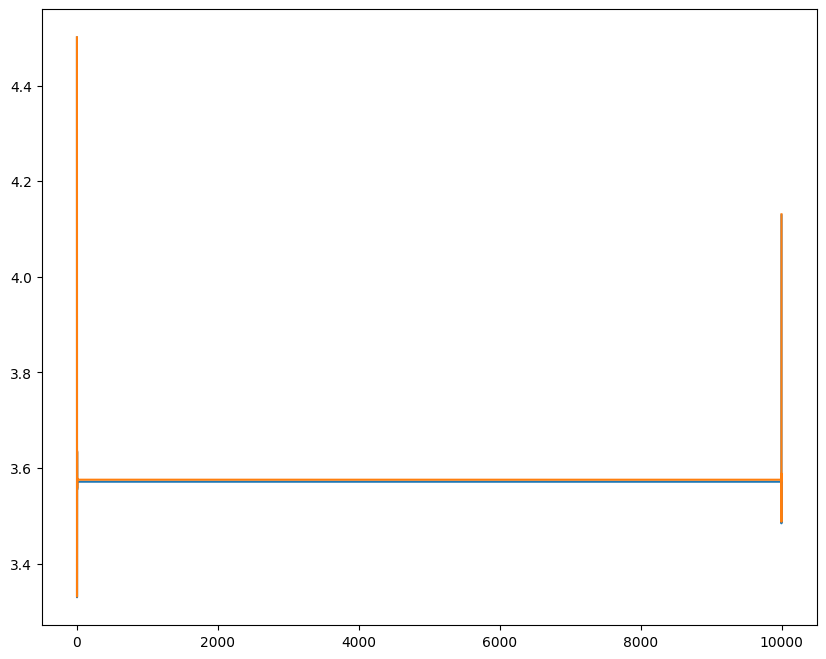

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.plot(X)
plt.plot(x)